In [1]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

from fuzzywuzzy import fuzz

import numpy as np

In [2]:
df = pd.read_csv('Test-data-analyst-soleadify.csv')

In [3]:
df.head()

,Source 1 - full address,Source 1 - phone number,Source 1 - Region,Source 1 - City,Source 1 - Country,Source 3 - Website,Source 3 - Activity,Source 2 - Activity,Source 2 - Website,Source 2 - Country,...,Source 2 - Phone,Source 3 - Country,Source 3 - Region,Source 3 - City,Source 3 - Phone,Source 4 - Activity,Unnamed: 18,Source 5 - Activity,Unnamed: 20,Source 6 - Activity
0,32 BLUE SPRINGS RD NORTH YORK ON M6L2T3 CA,4168582406,on,north york,canada,safeelectricalsolutions.ca,Electrical & Wiring Contractors,Energy - Equipment & Supplies,safeelectricalsolutions.ca,NaN,...,19057859000,canada,ontario,scarborough,1.416237e+10,Electrical & Wiring Contractors,NaN,NaN,NaN,Electric utility company
1,ON CA,0,on,NaN,canada,auto-master.com,NaN,NaN,NaN,NaN,...,NaN,united states,texas,houston,1.855993e+10,NaN,NaN,NaN,NaN,NaN
2,ON CA,0,on,NaN,canada,NaN,Bakeries & Desserts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Vintage Clothing Store,NaN,Bakeries & Desserts,NaN,NaN
3,2000 TALBOT RD WINDSOR ON N9A6S4 CA,0,on,windsor,canada,stclaircollege.ca,NaN,NaN,stclaircollege.ca,canada,...,"+15199722727,+15199722739,+15199661656",canada,ontario,windsor,1.519972e+10,NaN,NaN,NaN,NaN,NaN
4,5117 52 ST WABAMUN AB T0E2K0 CA,9059653927,ab,wabamun,canada,NaN,Oil & Gas - Extraction & Distribution,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(34706, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34706 entries, 0 to 34705
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Source 1 - full address  34705 non-null  object 
 1   Source 1 - phone number  34706 non-null  int64  
 2   Source 1 - Region        30717 non-null  object 
 3   Source 1 - City          30284 non-null  object 
 4   Source 1 - Country       34706 non-null  object 
 5   Source 3 - Website       29169 non-null  object 
 6   Source 3 - Activity      29287 non-null  object 
 7   Source 2 - Activity      16320 non-null  object 
 8   Source 2 - Website       18986 non-null  object 
 9   Source 2 - Country       15564 non-null  object 
 10  Source 2 - Region        15564 non-null  object 
 11  Source 2 - City          15564 non-null  object 
 12  Source 2 - Phone         18433 non-null  object 
 13  Source 3 - Country       22952 non-null  object 
 14  Source 3 - Region     

In [6]:
df.dtypes

Source 1 - full address     object
Source 1 - phone number      int64
Source 1 - Region           object
Source 1 - City             object
Source 1 - Country          object
Source 3 - Website          object
Source 3 - Activity         object
Source 2 - Activity         object
Source 2 - Website          object
Source 2 - Country          object
Source 2 - Region           object
Source 2 - City             object
Source 2 - Phone            object
Source 3 - Country          object
Source 3 - Region           object
Source 3 - City             object
Source 3 - Phone           float64
Source 4 - Activity         object
Unnamed: 18                float64
Source 5 - Activity         object
Unnamed: 20                float64
Source 6 - Activity         object
dtype: object

In [7]:
df = df.astype(str)
# df.dtypes

In [8]:
df.isnull().sum()

Source 1 - full address    0
Source 1 - phone number    0
Source 1 - Region          0
Source 1 - City            0
Source 1 - Country         0
Source 3 - Website         0
Source 3 - Activity        0
Source 2 - Activity        0
Source 2 - Website         0
Source 2 - Country         0
Source 2 - Region          0
Source 2 - City            0
Source 2 - Phone           0
Source 3 - Country         0
Source 3 - Region          0
Source 3 - City            0
Source 3 - Phone           0
Source 4 - Activity        0
Unnamed: 18                0
Source 5 - Activity        0
Unnamed: 20                0
Source 6 - Activity        0
dtype: int64

In [9]:
print(len(df[(df['Source 1 - phone number'] == df['Source 2 - Phone']) & (df['Source 2 - Phone'] == df['Source 3 - Phone'])]))

0


In [10]:
df = df.apply(lambda col: col.str.lower().str.strip())

In [11]:
def clean_phone_number(phone):
    # Keep only digits and commas
    cleaned_phone = ''.join(filter(lambda x: x.isdigit() or x == ',', str(phone)))
    return cleaned_phone if len(cleaned_phone) >= 10 else ""   # Return only numbers with at least 10 characters

# Apply the cleaning function to each phone number column
df['Source 1 - phone number'] = df['Source 1 - phone number'].apply(clean_phone_number)
df['Source 2 - Phone'] = df['Source 2 - Phone'].apply(clean_phone_number)
df['Source 3 - Phone'] = df['Source 3 - Phone'].apply(clean_phone_number)

In [12]:
df.head()

,Source 1 - full address,Source 1 - phone number,Source 1 - Region,Source 1 - City,Source 1 - Country,Source 3 - Website,Source 3 - Activity,Source 2 - Activity,Source 2 - Website,Source 2 - Country,...,Source 2 - Phone,Source 3 - Country,Source 3 - Region,Source 3 - City,Source 3 - Phone,Source 4 - Activity,Unnamed: 18,Source 5 - Activity,Unnamed: 20,Source 6 - Activity
0,32 blue springs rd north york on m6l2t3 ca,4168582406,on,north york,canada,safeelectricalsolutions.ca,electrical & wiring contractors,energy - equipment & supplies,safeelectricalsolutions.ca,nan,...,19057859000,canada,ontario,scarborough,141623671000,electrical & wiring contractors,nan,nan,nan,electric utility company
1,on ca,,on,nan,canada,auto-master.com,nan,nan,nan,nan,...,,united states,texas,houston,185599299130,nan,nan,nan,nan,nan
2,on ca,,on,nan,canada,nan,bakeries & desserts,nan,nan,nan,...,,nan,nan,nan,,vintage clothing store,nan,bakeries & desserts,nan,nan
3,2000 talbot rd windsor on n9a6s4 ca,,on,windsor,canada,stclaircollege.ca,nan,nan,stclaircollege.ca,canada,...,"15199722727,15199722739,15199661656",canada,ontario,windsor,151997227270,nan,nan,nan,nan,nan
4,5117 52 st wabamun ab t0e2k0 ca,9059653927,ab,wabamun,canada,nan,oil & gas - extraction & distribution,nan,nan,nan,...,,nan,nan,nan,,nan,nan,nan,nan,nan


In [13]:
print(len(df[(df['Source 3 - Website'] == df['Source 2 - Website'])]))

23987


In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34701    False
34702    False
34703    False
34704    False
34705    False
Length: 34706, dtype: bool

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.shape

(33540, 22)

In [17]:
print(len(df[(df['Source 1 - Country'] == df['Source 2 - Country']) & (df['Source 1 - Country'] == df['Source 3 - Country'])]))


11880


In [18]:
cols = {
    'Source 1 - full address': 'S1-full address',
    'Source 1 - phone number': 'S1-phone',
    'Source 1 - Region': 'S1-region',
    'Source 1 - City': 'S1-city',
    'Source 1 - Country': 'S1-country',
    'Source 2 - Activity': 'S2-activity',
    'Source 2 - Website': 'S2-website',
    'Source 2 - Country': 'S2-country',
    'Source 2 - Region': 'S2-region',
    'Source 2 - City': 'S2-city',
    'Source 2 - Phone': 'S2-phone',
    'Source 3 - Website': 'S3-website',
    'Source 3 - Activity': 'S3-activity',
    'Source 3 - Country': 'S3-country',
    'Source 3 - Region': 'S3-region',
    'Source 3 - City': 'S3-city',
    'Source 3 - Phone': 'S3-phone',
    'Source 4 - Activity': 'S4-activity',
    'Source 5 - Activity': 'S5-activity',
    'Source 6 - Activity': 'S6-activity',
}

# Keep desired columns and apply renaming
df = df.rename(columns=cols)

# Keep only the mentioned columns
df = df[list(cols.values())]

In [19]:
df.head()

,S1-full address,S1-phone,S1-region,S1-city,S1-country,S2-activity,S2-website,S2-country,S2-region,S2-city,S2-phone,S3-website,S3-activity,S3-country,S3-region,S3-city,S3-phone,S4-activity,S5-activity,S6-activity
0,32 blue springs rd north york on m6l2t3 ca,4168582406,on,north york,canada,energy - equipment & supplies,safeelectricalsolutions.ca,nan,nan,nan,19057859000,safeelectricalsolutions.ca,electrical & wiring contractors,canada,ontario,scarborough,141623671000,electrical & wiring contractors,nan,electric utility company
1,on ca,,on,nan,canada,nan,nan,nan,nan,nan,,auto-master.com,nan,united states,texas,houston,185599299130,nan,nan,nan
2,on ca,,on,nan,canada,nan,nan,nan,nan,nan,,nan,bakeries & desserts,nan,nan,nan,,vintage clothing store,bakeries & desserts,nan
3,2000 talbot rd windsor on n9a6s4 ca,,on,windsor,canada,nan,stclaircollege.ca,canada,ontario,windsor,"15199722727,15199722739,15199661656",stclaircollege.ca,nan,canada,ontario,windsor,151997227270,nan,nan,nan
4,5117 52 st wabamun ab t0e2k0 ca,9059653927,ab,wabamun,canada,nan,nan,nan,nan,nan,,nan,oil & gas - extraction & distribution,nan,nan,nan,,nan,nan,nan


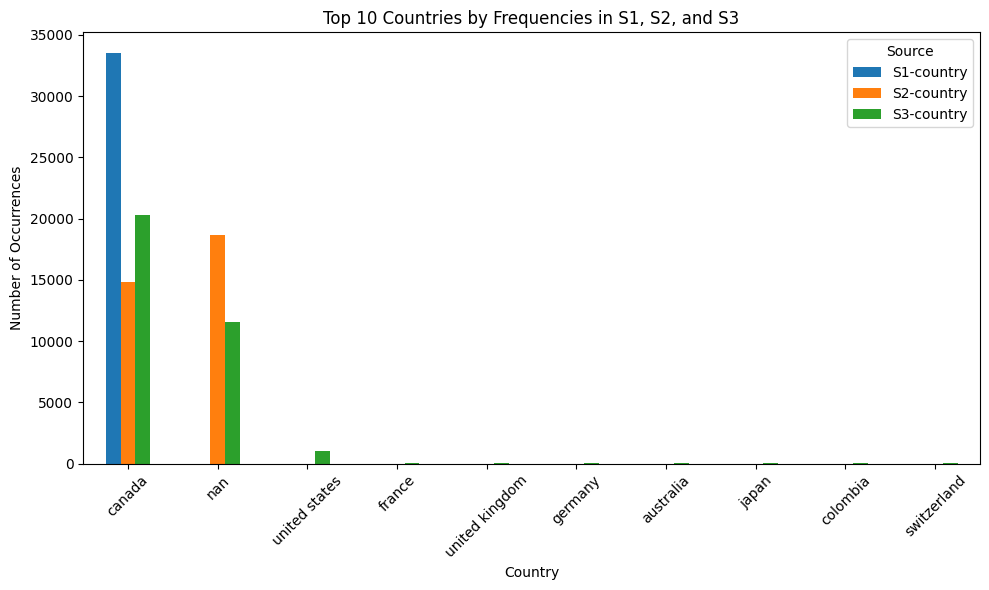

In [20]:
# Calculate the frequencies for each country column
s1_country_counts = df['S1-country'].value_counts()
s2_country_counts = df['S2-country'].value_counts()
s3_country_counts = df['S3-country'].value_counts()

# Create a simple DataFrame with frequencies from each source
country_counts = pd.DataFrame({
    'S1-country': s1_country_counts,
    'S2-country': s2_country_counts,
    'S3-country': s3_country_counts
}).fillna(0)

# Calculate the top 10 countries based on the total from all sources
top_10_countries = country_counts.sum(axis=1).sort_values(ascending=False).head(10)

# Select data only for the top 10 countries
top_10_data = country_counts.loc[top_10_countries.index]

# Create the chart
top_10_data.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries by Frequencies in S1, S2, and S3')
plt.xlabel('Country')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.legend(title='Source')
plt.tight_layout()

plt.show()

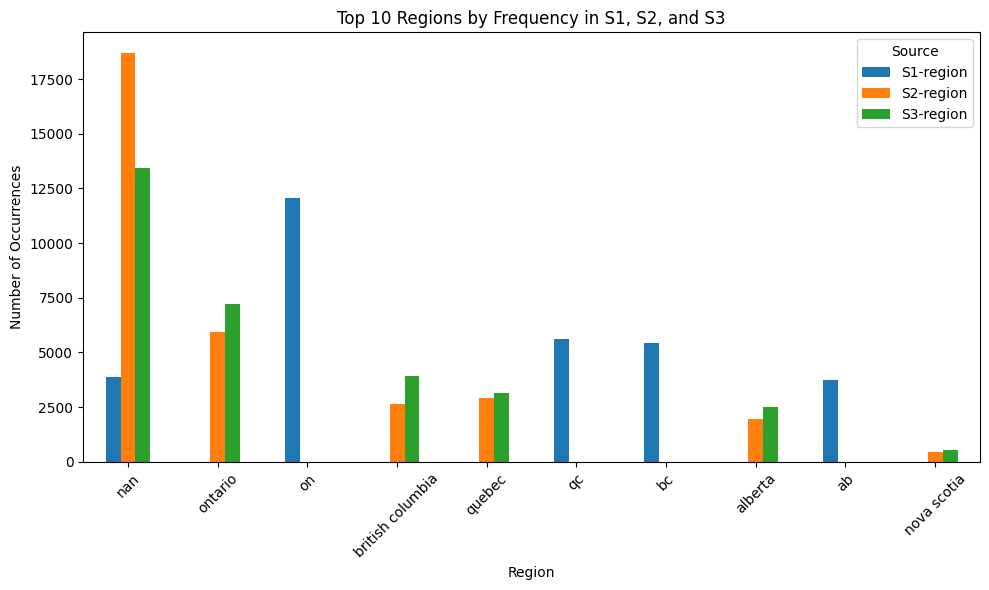

In [21]:
# Calculate the frequencies for each region column
s1_region_counts = df['S1-region'].value_counts()
s2_region_counts = df['S2-region'].value_counts()
s3_region_counts = df['S3-region'].value_counts()

# Create a simple DataFrame with frequencies from each source
region_counts = pd.DataFrame({
    'S1-region': s1_region_counts,
    'S2-region': s2_region_counts,
    'S3-region': s3_region_counts
}).fillna(0)

# Calculate the top 10 regions based on the total from all sources
top_10_regions = region_counts.sum(axis=1).sort_values(ascending=False).head(10)

# Select data only for the top 10 regions
top_10_region_data = region_counts.loc[top_10_regions.index]

# Create the plot
top_10_region_data.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Regions by Frequency in S1, S2, and S3')
plt.xlabel('Region')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.legend(title='Source')
plt.tight_layout()

plt.show()

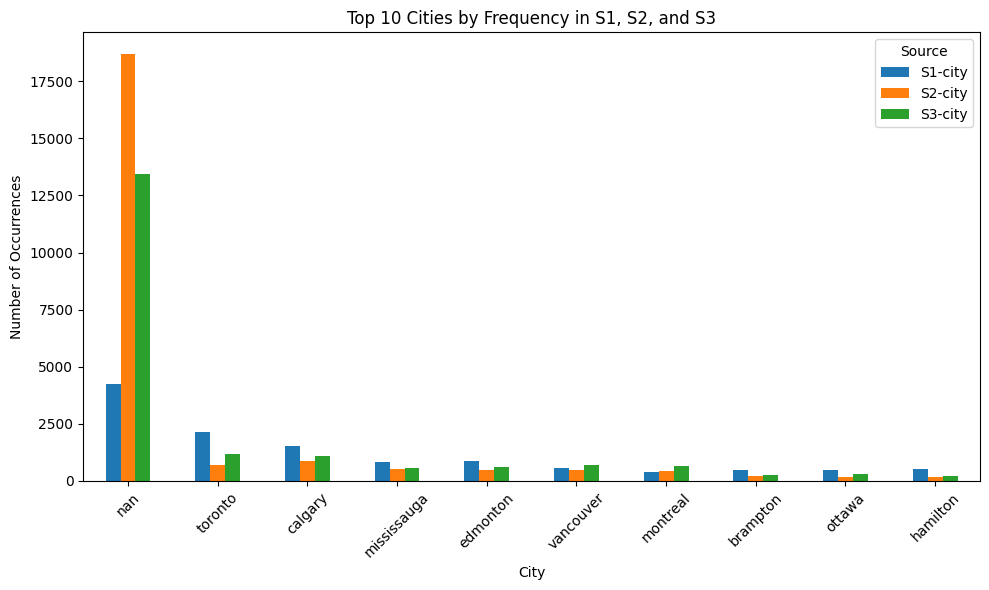

In [22]:
# Calculate the frequencies for each city column
s1_city_counts = df['S1-city'].value_counts()
s2_city_counts = df['S2-city'].value_counts()
s3_city_counts = df['S3-city'].value_counts()

# Create a simple DataFrame with frequencies from each source
city_counts = pd.DataFrame({
    'S1-city': s1_city_counts,
    'S2-city': s2_city_counts,
    'S3-city': s3_city_counts
}).fillna(0)

# Calculate the top 10 cities based on the total from all sources
top_10_cities = city_counts.sum(axis=1).sort_values(ascending=False).head(10)

# Select data only for the top 10 cities
top_10_city_data = city_counts.loc[top_10_cities.index]

# Create the plot
top_10_city_data.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Cities by Frequency in S1, S2, and S3')
plt.xlabel('City')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.legend(title='Source')
plt.tight_layout()

plt.show()

In [23]:
# df['Phone'] = df[['S1-phone', 'S2-phone', 'S3-phone']].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

In [24]:
# df.head()

In [25]:
df.replace('nan', '', inplace=True)
df.head()

,S1-full address,S1-phone,S1-region,S1-city,S1-country,S2-activity,S2-website,S2-country,S2-region,S2-city,S2-phone,S3-website,S3-activity,S3-country,S3-region,S3-city,S3-phone,S4-activity,S5-activity,S6-activity
0,32 blue springs rd north york on m6l2t3 ca,4168582406,on,north york,canada,energy - equipment & supplies,safeelectricalsolutions.ca,,,,19057859000,safeelectricalsolutions.ca,electrical & wiring contractors,canada,ontario,scarborough,141623671000,electrical & wiring contractors,,electric utility company
1,on ca,,on,,canada,,,,,,,auto-master.com,,united states,texas,houston,185599299130,,,
2,on ca,,on,,canada,,,,,,,,bakeries & desserts,,,,,vintage clothing store,bakeries & desserts,
3,2000 talbot rd windsor on n9a6s4 ca,,on,windsor,canada,,stclaircollege.ca,canada,ontario,windsor,"15199722727,15199722739,15199661656",stclaircollege.ca,,canada,ontario,windsor,151997227270,,,
4,5117 52 st wabamun ab t0e2k0 ca,9059653927,ab,wabamun,canada,,,,,,,,oil & gas - extraction & distribution,,,,,,,


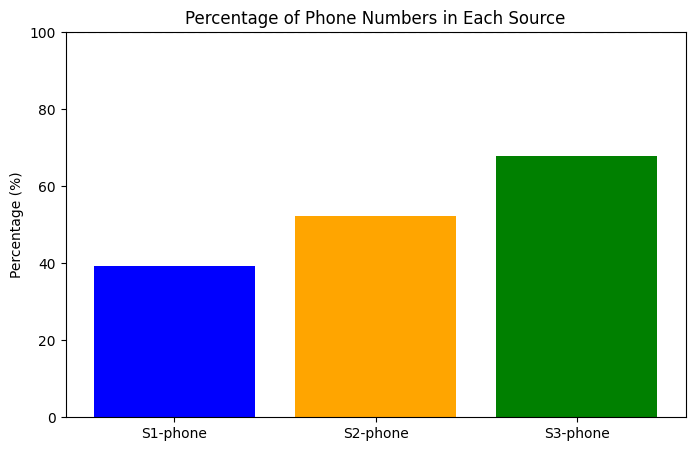

In [26]:
# Calculate the number of lines with phone numbers in each source
s1_phone_count = df['S1-phone'].notna().sum() - df['S1-phone'].eq('').sum()
s2_phone_count = df['S2-phone'].notna().sum() - df['S2-phone'].eq('').sum()
s3_phone_count = df['S3-phone'].notna().sum() - df['S3-phone'].eq('').sum()

# Calculate the percentages
s1_phone_percentage = (s1_phone_count / len(df)) * 100
s2_phone_percentage = (s2_phone_count / len(df)) * 100
s3_phone_percentage = (s3_phone_count / len(df)) * 100

# Create a bar chart
labels = ['S1-phone', 'S2-phone', 'S3-phone']
percentages = [s1_phone_percentage, s2_phone_percentage, s3_phone_percentage]

plt.figure(figsize=(8, 5))
plt.bar(labels, percentages, color=['blue', 'orange', 'green'])
plt.title('Percentage of Phone Numbers in Each Source')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set Y-axis limit
plt.axhline(y=100, color='gray', linestyle='--')  # 100% line
plt.show()

In [27]:
def select_best_phone(s1, s2, s3):
    # Create a list of valid phone numbers
    phones = []
    if s1:
        phones.extend(s1.split(','))
    if s2:
        phones.extend(s2.split(','))
    if s3:
        phones.extend(s3.split(','))

    # Clean extra spaces and remove empty values
    phones = [phone.strip() for phone in phones if phone.strip()]

    # If less than 2 phone numbers, return the first or ''
    if len(phones) < 2:
        return phones[0] if phones else ''

    # Check similarity using fuzzywuzzy
    for i in range(len(phones)):
        for j in range(i + 1, len(phones)):
            similarity = fuzz.ratio(phones[i], phones[j])

            # 1. If 100% similar, return that number
            if similarity == 100:
                return phones[i]

    # 2. If similar between 85-100%, return the first
    for i in range(len(phones)):
        for j in range(i + 1, len(phones)):
            similarity = fuzz.ratio(phones[i], phones[j])
            if 85 <= similarity < 100:
                return phones[i]

    # 3. If none of the above apply, return the number from S3
    return s3 if s3 else phones[0]

# Apply the function on the dataframe
df['Phone'] = df.apply(lambda row: select_best_phone(row['S1-phone'], row['S2-phone'], row['S3-phone']), axis=1)

df.head()

,S1-full address,S1-phone,S1-region,S1-city,S1-country,S2-activity,S2-website,S2-country,S2-region,S2-city,...,S3-website,S3-activity,S3-country,S3-region,S3-city,S3-phone,S4-activity,S5-activity,S6-activity,Phone
0,32 blue springs rd north york on m6l2t3 ca,4168582406,on,north york,canada,energy - equipment & supplies,safeelectricalsolutions.ca,,,,...,safeelectricalsolutions.ca,electrical & wiring contractors,canada,ontario,scarborough,141623671000,electrical & wiring contractors,,electric utility company,141623671000
1,on ca,,on,,canada,,,,,,...,auto-master.com,,united states,texas,houston,185599299130,,,,185599299130
2,on ca,,on,,canada,,,,,,...,,bakeries & desserts,,,,,vintage clothing store,bakeries & desserts,,
3,2000 talbot rd windsor on n9a6s4 ca,,on,windsor,canada,,stclaircollege.ca,canada,ontario,windsor,...,stclaircollege.ca,,canada,ontario,windsor,151997227270,,,,15199722727
4,5117 52 st wabamun ab t0e2k0 ca,9059653927,ab,wabamun,canada,,,,,,...,,oil & gas - extraction & distribution,,,,,,,,9059653927


In [28]:
# Calculate the total number of rows in the dataframe
total_rows = len(df)

# Calculate the total number of unique and filled values for S2-website
s2_unique = df['S2-website'].nunique()  # number of unique values
s2_filled = df['S2-website'].ne('').sum()  # number of filled values (not equal to '')

# Calculate the total number of unique and filled values for S3-website
s3_unique = df['S3-website'].nunique()  # number of unique values
s3_filled = df['S3-website'].ne('').sum()  # number of filled values (not equal to '')

# Display the results, including the total number of rows
print(f'S2-website: {s2_unique} unique values, {s2_filled} filled out of {total_rows} rows')
print(f'S3-website: {s3_unique} unique values, {s3_filled} filled out of {total_rows} rows')

S2-website: 14873 unique values, 18100 filled out of 33540 rows
S3-website: 23849 unique values, 28061 filled out of 33540 rows


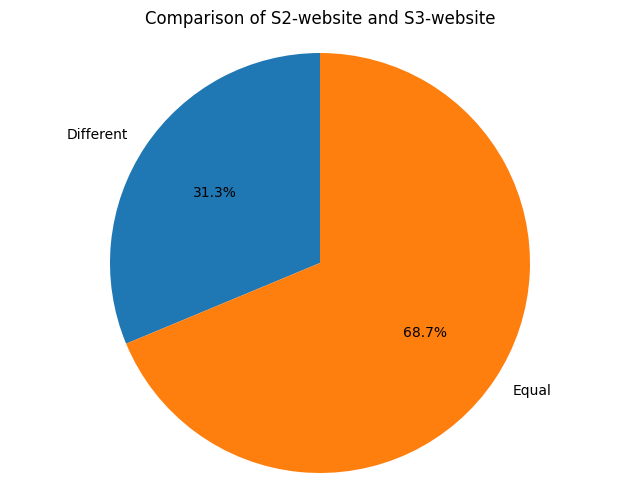

In [29]:
# Calculate the number of different and equal values
differences_count = (df['S2-website'] != df['S3-website']).sum()
equal_count = (df['S2-website'] == df['S3-website']).sum()

# Create a pie chart
labels = ['Different', 'Equal']
sizes = [differences_count, equal_count]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Comparison of S2-website and S3-website')
plt.axis('equal') 
plt.show()

In [30]:
# Filter the lines where S2-website is different from S3-website
different_websites = df[df['S2-website'] != df['S3-website']]

# Display only the S2-website and S3-website columns
different_websites[['S2-website', 'S3-website']]

,S2-website,S3-website
1,,auto-master.com
5,,primusconstruction.ca
6,,allgreentreecare.com
8,,sharpknifeshop.com
12,,napaautopro.com
...,...,...
34694,,andredomon1975.com
34695,,wmco.ca
34699,,heartly.ee
34700,,cleartool.ca


In [31]:
# Check the condition and count the lines that satisfy it
exist_different = ((df['S2-website'] != '') & 
                   (df['S3-website'] != '') & 
                   (df['S2-website'] != df['S3-website'])).sum()

print(exist_different)

0


In [32]:
def choose_website(row):
    s2_website = row['S2-website']
    s3_website = row['S3-website']
    
    # If both websites are equal and not empty, return one
    if s2_website == s3_website and s2_website != '':
        return s2_website
    
    # If S2-website is empty and S3-website is not, return S3
    if s2_website == '' and s3_website != '':
        return s3_website
    
    # If S3-website is empty and S2-website is not, return S2
    if s3_website == '' and s2_website != '':
        return s2_website
    
    # If both are empty, return ''
    return ''

# Call the function to create a new column 'Website'
df['Website'] = df.apply(choose_website, axis=1)

In [33]:
df.head()

,S1-full address,S1-phone,S1-region,S1-city,S1-country,S2-activity,S2-website,S2-country,S2-region,S2-city,...,S3-activity,S3-country,S3-region,S3-city,S3-phone,S4-activity,S5-activity,S6-activity,Phone,Website
0,32 blue springs rd north york on m6l2t3 ca,4168582406,on,north york,canada,energy - equipment & supplies,safeelectricalsolutions.ca,,,,...,electrical & wiring contractors,canada,ontario,scarborough,141623671000,electrical & wiring contractors,,electric utility company,141623671000,safeelectricalsolutions.ca
1,on ca,,on,,canada,,,,,,...,,united states,texas,houston,185599299130,,,,185599299130,auto-master.com
2,on ca,,on,,canada,,,,,,...,bakeries & desserts,,,,,vintage clothing store,bakeries & desserts,,,
3,2000 talbot rd windsor on n9a6s4 ca,,on,windsor,canada,,stclaircollege.ca,canada,ontario,windsor,...,,canada,ontario,windsor,151997227270,,,,15199722727,stclaircollege.ca
4,5117 52 st wabamun ab t0e2k0 ca,9059653927,ab,wabamun,canada,,,,,,...,oil & gas - extraction & distribution,,,,,,,,9059653927,


In [34]:
df['S2-activity'].nunique()

388

In [35]:
df['S3-activity'].nunique()

551

In [36]:
df['S4-activity'].nunique()

342

In [37]:
df['S5-activity'].nunique()

540

In [38]:
df['S6-activity'].nunique()

1648

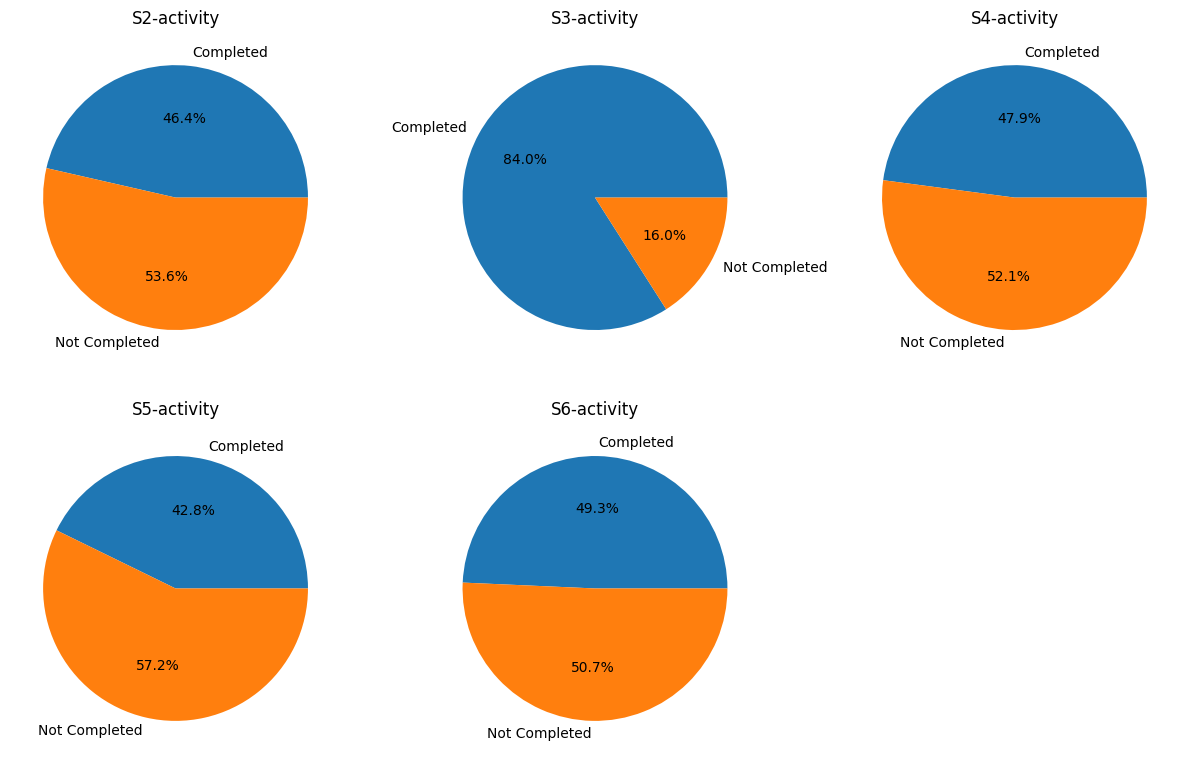

In [39]:
# Lists of activities
activities = ['S2-activity', 'S3-activity', 'S4-activity', 'S5-activity', 'S6-activity']

# Create a figure
plt.figure(figsize=(12, 8))

# Create pie charts in a loop
for i, activity in enumerate(activities):
    completed_count = (df[activity] != '').sum()
    not_completed_count = (df[activity] == '').sum()
    
    plt.subplot(2, 3, i + 1)  # Adjust for more rows and columns
    plt.pie([completed_count, not_completed_count], labels=['Completed', 'Not Completed'], autopct='%1.1f%%')
    plt.title(activity)

plt.tight_layout()
plt.show()

In [40]:
# Filtering non-empty values
filtered_df = df[(df['S2-activity'] != '') & 
                 (df['S3-activity'] != '') & 
                 (df['S4-activity'] != '') & 
                 (df['S5-activity'] != '') & 
                 (df['S6-activity'] != '')]

# Comparing values in columns S2, S3, S4, S5, and S6
equal_counts = (filtered_df['S2-activity'] == filtered_df['S3-activity']) & \
               (filtered_df['S3-activity'] == filtered_df['S4-activity']) & \
               (filtered_df['S4-activity'] == filtered_df['S5-activity']) & \
               (filtered_df['S5-activity'] == filtered_df['S6-activity'])

# Total number of lines where all activities are equal
matching_count = equal_counts.sum()

matching_count

np.int64(0)

In [41]:
def count_similar_activity_lines(df, columns):
    line_numbers_with_similar_activities = set()  # Set to avoid duplicates
    for index, row in df.iterrows():
        activities = [row[col] for col in columns if pd.notna(row[col]) and row[col] != '']
        for i in range(len(activities)):
            for j in range(i + 1, len(activities)):
                # Check similarity
                if fuzz.partial_ratio(activities[i], activities[j]) >= 80:  # 80% similarity
                    line_numbers_with_similar_activities.add(index)  # Add line index
                    break  # Exit loop once a similar activity is found

    return len(line_numbers_with_similar_activities)  # Return number of lines

# Call the function
count_of_similar_lines = count_similar_activity_lines(df, ['S2-activity', 'S3-activity', 'S4-activity', 'S5-activity', 'S6-activity'])

count_of_similar_lines

19301

In [42]:
def combine_activities(df, columns):
    combined_activities = []  # List to store combined activities

    for index, row in df.iterrows():
        activities = [row[col] for col in columns if pd.notna(row[col]) and row[col] != '']
        similar_activities = []  # List to store similar activities

        # Compare activities with each other
        for i in range(len(activities)):
            for j in range(i + 1, len(activities)):
                if fuzz.partial_ratio(activities[i], activities[j]) >= 80:  # 80% similarity
                    similar_activities.append(activities[i])
                    break  # Exit loop once a similar activity is found

        # If there are similar activities, choose the longest one
        if similar_activities:
            longest_activity = max(similar_activities, key=len)
        else:
            # If no similar activities, choose the longest from all activities
            longest_activity = max(activities, key=len) if activities else ''

        combined_activities.append(longest_activity)  # Add combined activity to list

    df['Activity'] = combined_activities
    return df

df = combine_activities(df, ['S2-activity', 'S3-activity', 'S4-activity', 'S5-activity', 'S6-activity'])

df.head()

,S1-full address,S1-phone,S1-region,S1-city,S1-country,S2-activity,S2-website,S2-country,S2-region,S2-city,...,S3-country,S3-region,S3-city,S3-phone,S4-activity,S5-activity,S6-activity,Phone,Website,Activity
0,32 blue springs rd north york on m6l2t3 ca,4168582406,on,north york,canada,energy - equipment & supplies,safeelectricalsolutions.ca,,,,...,canada,ontario,scarborough,141623671000,electrical & wiring contractors,,electric utility company,141623671000,safeelectricalsolutions.ca,electrical & wiring contractors
1,on ca,,on,,canada,,,,,,...,united states,texas,houston,185599299130,,,,185599299130,auto-master.com,
2,on ca,,on,,canada,,,,,,...,,,,,vintage clothing store,bakeries & desserts,,,,bakeries & desserts
3,2000 talbot rd windsor on n9a6s4 ca,,on,windsor,canada,,stclaircollege.ca,canada,ontario,windsor,...,canada,ontario,windsor,151997227270,,,,15199722727,stclaircollege.ca,
4,5117 52 st wabamun ab t0e2k0 ca,9059653927,ab,wabamun,canada,,,,,,...,,,,,,,,9059653927,,oil & gas - extraction & distribution


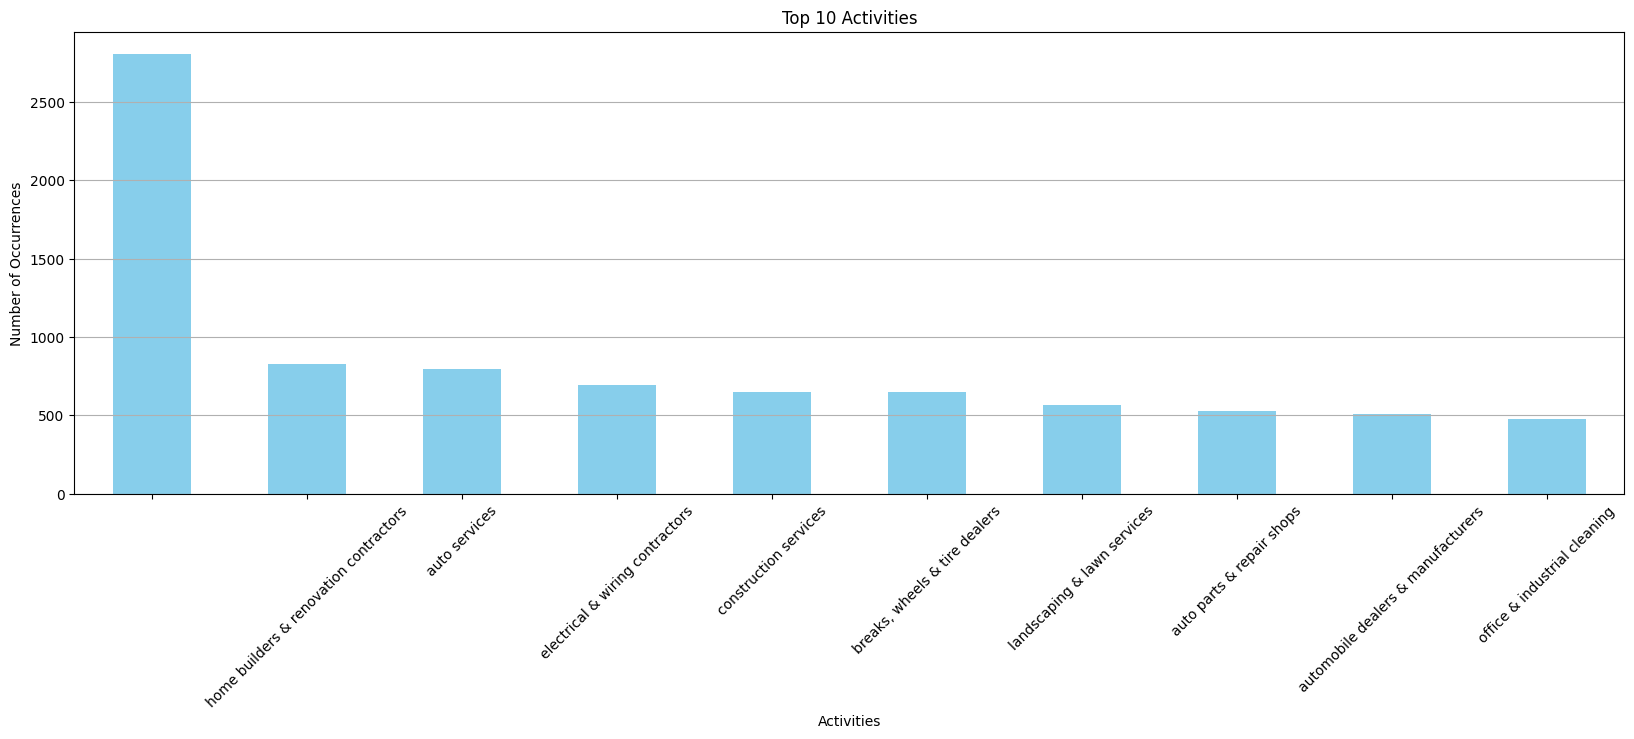

In [43]:
# Get the top 10 activities
top_activities = df['Activity'].value_counts().head(10)

# Create the chart
plt.figure(figsize=(20, 6))
top_activities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Activities')
plt.xlabel('Activities')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the chart
plt.show()

In [44]:
# Count the lines where S1-country, S2-country, and S3-country are equal
count_equal_lines = (
    (df['S1-country'] != '') & 
    (df['S2-country'] != '') & 
    (df['S3-country'] != '') & 
    (df['S1-country'] == df['S2-country']) & 
    (df['S2-country'] == df['S3-country'])
).sum()

count_equal_lines

np.int64(11880)

In [45]:
count_at_least_two_equal_lines = (
    ((df['S1-country'] != '') & (df['S2-country'] != '') & (df['S1-country'] == df['S2-country'])) |
    ((df['S1-country'] != '') & (df['S3-country'] != '') & (df['S1-country'] == df['S3-country'])) |
    ((df['S2-country'] != '') & (df['S3-country'] != '') & (df['S2-country'] == df['S3-country']))
).sum()

count_at_least_two_equal_lines

np.int64(23240)

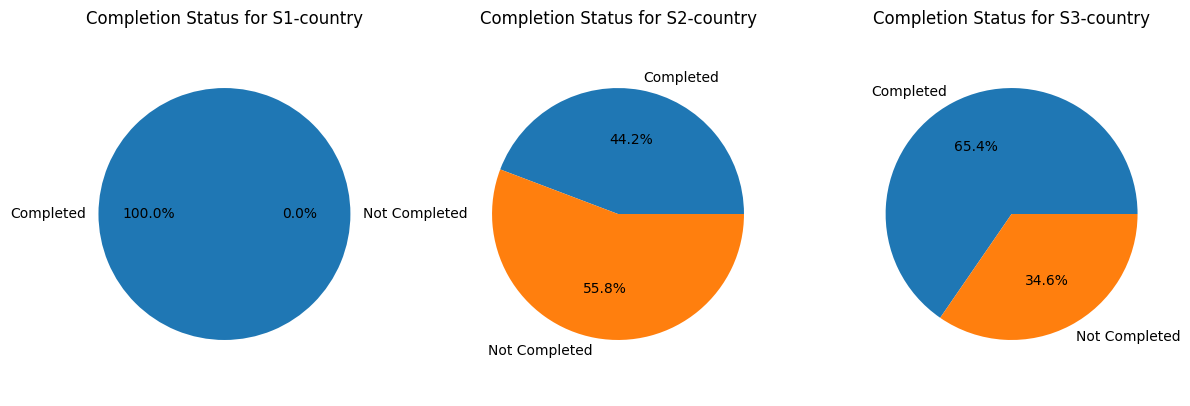

In [46]:
# Lists of countries
countries = ['S1-country', 'S2-country', 'S3-country']

# Create pie charts for each country
plt.figure(figsize=(12, 8))  # Adjust the figure size for multiple charts

for i, country in enumerate(countries):
    # Calculate completed and not completed counts
    completed_count = (df[country] != '').sum()
    not_completed_count = (df[country] == '').sum()
    
    # Create a subplot for each country
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid for more charts
    plt.pie([completed_count, not_completed_count], labels=['Completed', 'Not Completed'], autopct='%1.1f%%')
    plt.title(f'Completion Status for {country}')
    plt.axis('equal')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [47]:
def select_country_simple(df):
    selected_countries = [] 

    for index, row in df.iterrows():
        s1 = row['S1-country']
        s2 = row['S2-country']
        s3 = row['S3-country']
        
        # Check if at least two of the countries are equal
        if s1 == s2 or s1 == s3 or s2 == s3:
            # If there are at least two equal countries, select one
            selected_country = s1 if s1 else s2 if s2 else s3  # Choose the first complete country
        else:
            # If all are different, select S1
            selected_country = s1

        selected_countries.append(selected_country)  # Add the selected country to the list

    # Add the selected countries to the DataFrame
    df['Country'] = selected_countries
    return df

df = select_country_simple(df)

df.head()

,S1-full address,S1-phone,S1-region,S1-city,S1-country,S2-activity,S2-website,S2-country,S2-region,S2-city,...,S3-region,S3-city,S3-phone,S4-activity,S5-activity,S6-activity,Phone,Website,Activity,Country
0,32 blue springs rd north york on m6l2t3 ca,4168582406,on,north york,canada,energy - equipment & supplies,safeelectricalsolutions.ca,,,,...,ontario,scarborough,141623671000,electrical & wiring contractors,,electric utility company,141623671000,safeelectricalsolutions.ca,electrical & wiring contractors,canada
1,on ca,,on,,canada,,,,,,...,texas,houston,185599299130,,,,185599299130,auto-master.com,,canada
2,on ca,,on,,canada,,,,,,...,,,,vintage clothing store,bakeries & desserts,,,,bakeries & desserts,canada
3,2000 talbot rd windsor on n9a6s4 ca,,on,windsor,canada,,stclaircollege.ca,canada,ontario,windsor,...,ontario,windsor,151997227270,,,,15199722727,stclaircollege.ca,,canada
4,5117 52 st wabamun ab t0e2k0 ca,9059653927,ab,wabamun,canada,,,,,,...,,,,,,,9059653927,,oil & gas - extraction & distribution,canada


In [48]:
# Count the rows where at least two of S1-region, S2-region, and S3-region are equal
count_equal_lines_region = (
    ((df['S1-region'] == df['S2-region']) | 
     (df['S1-region'] == df['S3-region']) | 
     (df['S2-region'] == df['S3-region'])) & 
    (df['S1-region'] != '') & 
    (df['S2-region'] != '') & 
    (df['S3-region'] != '')
).sum()

count_equal_lines_region

np.int64(9402)

In [49]:
# Dictionary with abbreviations and full names (all lowercase)
region_dict = {
    'ab': 'alberta',
    'bc': 'british columbia',
    'mb': 'manitoba',
    'nb': 'new brunswick',
    'nl': 'newfoundland and labrador',
    'ns': 'nova scotia',
    'nt': 'northwest territories',
    'nu': 'nunavut',
    'on': 'ontario',
    'pe': 'prince edward island',
    'qc': 'quebec',
    'sk': 'saskatchewan',
    'yt': 'yukon'
}

# Clean the S1-region column (remove spaces and convert to lowercase)
df['S1-region'] = df['S1-region'].str.strip().str.lower()

# Check unique values in the S1-region column before mapping
unique_values_before = df['S1-region'].unique()

# Apply the dictionary to the 'S1-region' column to transform abbreviations
df['S1-region'] = df['S1-region'].map(region_dict)

In [50]:
df.head()

,S1-full address,S1-phone,S1-region,S1-city,S1-country,S2-activity,S2-website,S2-country,S2-region,S2-city,...,S3-region,S3-city,S3-phone,S4-activity,S5-activity,S6-activity,Phone,Website,Activity,Country
0,32 blue springs rd north york on m6l2t3 ca,4168582406,ontario,north york,canada,energy - equipment & supplies,safeelectricalsolutions.ca,,,,...,ontario,scarborough,141623671000,electrical & wiring contractors,,electric utility company,141623671000,safeelectricalsolutions.ca,electrical & wiring contractors,canada
1,on ca,,ontario,,canada,,,,,,...,texas,houston,185599299130,,,,185599299130,auto-master.com,,canada
2,on ca,,ontario,,canada,,,,,,...,,,,vintage clothing store,bakeries & desserts,,,,bakeries & desserts,canada
3,2000 talbot rd windsor on n9a6s4 ca,,ontario,windsor,canada,,stclaircollege.ca,canada,ontario,windsor,...,ontario,windsor,151997227270,,,,15199722727,stclaircollege.ca,,canada
4,5117 52 st wabamun ab t0e2k0 ca,9059653927,alberta,wabamun,canada,,,,,,...,,,,,,,9059653927,,oil & gas - extraction & distribution,canada


In [51]:
# Count the rows where at least two of S1-region, S2-region, and S3-region are equal
count_equal_lines_region = (
    ((df['S1-region'] == df['S2-region']) | 
     (df['S1-region'] == df['S3-region']) | 
     (df['S2-region'] == df['S3-region'])) & 
    (df['S1-region'] != '') & 
    (df['S2-region'] != '') & 
    (df['S3-region'] != '')
).sum()

count_equal_lines_region

np.int64(11420)

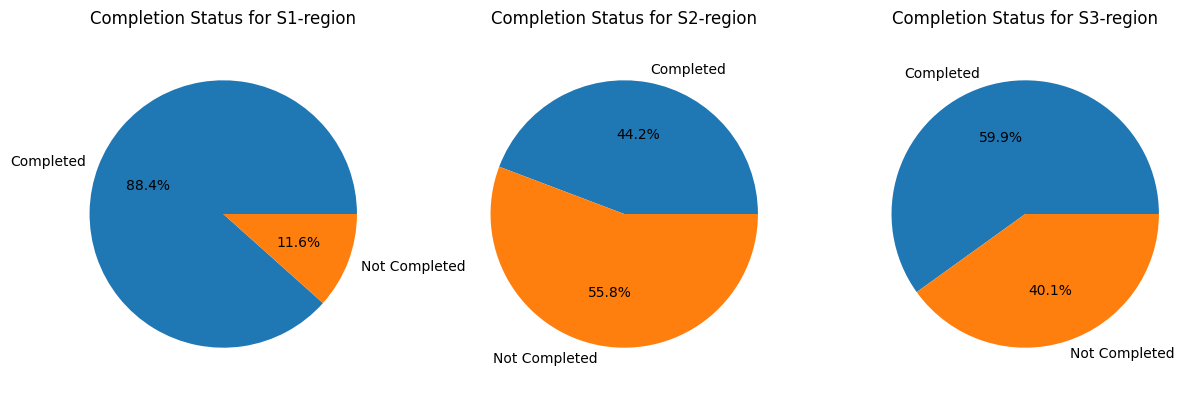

In [52]:
# List of regions
regions = ['S1-region', 'S2-region', 'S3-region']

# Create pie charts for each region
plt.figure(figsize=(12, 8))  # Adjust figure size for multiple charts

for i, region in enumerate(regions):
    # Replace empty strings with NaN (without inplace modification)
    df[region] = df[region].replace('', np.nan)
    
    # Calculate completed and not completed values
    completed_count = df[region].notna().sum()  # Completed values (not NaN)
    not_completed_count = df[region].isna().sum()  # Not completed (NaN)
    
    # Create a subplot for each region
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid for more charts
    plt.pie([completed_count, not_completed_count], labels=['Completed', 'Not Completed'], autopct='%1.1f%%')
    plt.title(f'Completion Status for {region}')
    plt.axis('equal')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [53]:
df['S2-region'].value_counts()

S2-region
ontario                      5957
quebec                       2924
british columbia             2645
alberta                      1976
nova scotia                   432
saskatchewan                  250
manitoba                      224
new brunswick                 200
newfoundland and labrador     135
prince edward island           62
yukon                          17
northwest territories          13
wallonia                        1
nunavut                         1
tasmania                        1
Name: count, dtype: int64

In [54]:
def select_region(row):
    # Extract values from the three region columns
    region_s1 = row['S1-region']
    region_s2 = row['S2-region']
    region_s3 = row['S3-region']
    
    # Check if there are two identical regions
    if region_s1 == region_s2 or region_s1 == region_s3:
        return region_s1
    elif region_s2 == region_s3:
        return region_s2
    # Check if there is a single non-empty region
    elif pd.notna(region_s1):
        return region_s1
    elif pd.notna(region_s2):
        return region_s2
    elif pd.notna(region_s3):
        return region_s3
    # If all are different or empty, return the region from source 1
    else:
        return region_s1

# Apply the function on the DataFrame
df['Region'] = df.apply(select_region, axis=1)

df.head()

,S1-full address,S1-phone,S1-region,S1-city,S1-country,S2-activity,S2-website,S2-country,S2-region,S2-city,...,S3-city,S3-phone,S4-activity,S5-activity,S6-activity,Phone,Website,Activity,Country,Region
0,32 blue springs rd north york on m6l2t3 ca,4168582406,ontario,north york,canada,energy - equipment & supplies,safeelectricalsolutions.ca,,NaN,,...,scarborough,141623671000,electrical & wiring contractors,,electric utility company,141623671000,safeelectricalsolutions.ca,electrical & wiring contractors,canada,ontario
1,on ca,,ontario,,canada,,,,NaN,,...,houston,185599299130,,,,185599299130,auto-master.com,,canada,ontario
2,on ca,,ontario,,canada,,,,NaN,,...,,,vintage clothing store,bakeries & desserts,,,,bakeries & desserts,canada,ontario
3,2000 talbot rd windsor on n9a6s4 ca,,ontario,windsor,canada,,stclaircollege.ca,canada,ontario,windsor,...,windsor,151997227270,,,,15199722727,stclaircollege.ca,,canada,ontario
4,5117 52 st wabamun ab t0e2k0 ca,9059653927,alberta,wabamun,canada,,,,NaN,,...,,,,,,9059653927,,oil & gas - extraction & distribution,canada,alberta


In [55]:
count_equal_lines_city = (
    ((df['S1-city'] == df['S2-city']) | 
     (df['S1-city'] == df['S3-city']) | 
     (df['S2-city'] == df['S3-city'])) & 
    (df['S1-city'] != '') & 
    (df['S2-city'] != '') & 
    (df['S3-city'] != '')
).sum()

count_equal_lines_city

np.int64(9260)

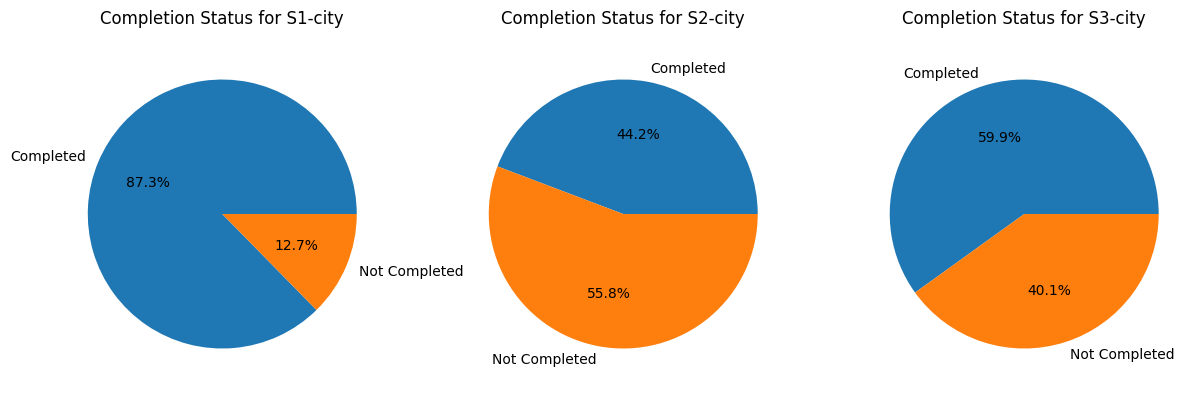

In [56]:
# List of cities
cities = ['S1-city', 'S2-city', 'S3-city']

# Create pie charts for each city
plt.figure(figsize=(12, 8))  # Adjust figure size for multiple charts

for i, city in enumerate(cities):
    # Replace empty strings with NaN (without inplace modification)
    df[city] = df[city].replace('', np.nan)
    
    # Calculate completed and not completed values
    completed_count = df[city].notna().sum()  # Completed values (not NaN)
    not_completed_count = df[city].isna().sum()  # Not completed (NaN)
    
    # Create a subplot for each city
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid for more charts
    plt.pie([completed_count, not_completed_count], labels=['Completed', 'Not Completed'], autopct='%1.1f%%')
    plt.title(f'Completion Status for {city}')
    plt.axis('equal')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [57]:
def combine_cities(row):
    city1, city2, city3 = row['S1-city'], row['S2-city'], row['S3-city']
    
    # If two of the cities are equal and not NaN, return that city
    if city1 == city2 and pd.notna(city1):
        return city1
    elif city1 == city3 and pd.notna(city1):
        return city1
    elif city2 == city3 and pd.notna(city2):
        return city2
    
    # If only one city is filled and the others are NaN, return that city
    if pd.notna(city1) and pd.isna(city2) and pd.isna(city3):
        return city1
    if pd.isna(city1) and pd.notna(city2) and pd.isna(city3):
        return city2
    if pd.isna(city1) and pd.isna(city2) and pd.notna(city3):
        return city3
    
    # If all are different, return S1-city if not empty; otherwise, return S3-city
    if pd.notna(city1):
        return city1
    else:
        return city3

# Apply the function on the DataFrame to create a new column 'City'
df['City'] = df.apply(combine_cities, axis=1)
df.head()

,S1-full address,S1-phone,S1-region,S1-city,S1-country,S2-activity,S2-website,S2-country,S2-region,S2-city,...,S3-phone,S4-activity,S5-activity,S6-activity,Phone,Website,Activity,Country,Region,City
0,32 blue springs rd north york on m6l2t3 ca,4168582406,ontario,north york,canada,energy - equipment & supplies,safeelectricalsolutions.ca,,NaN,NaN,...,141623671000,electrical & wiring contractors,,electric utility company,141623671000,safeelectricalsolutions.ca,electrical & wiring contractors,canada,ontario,north york
1,on ca,,ontario,NaN,canada,,,,NaN,NaN,...,185599299130,,,,185599299130,auto-master.com,,canada,ontario,houston
2,on ca,,ontario,NaN,canada,,,,NaN,NaN,...,,vintage clothing store,bakeries & desserts,,,,bakeries & desserts,canada,ontario,NaN
3,2000 talbot rd windsor on n9a6s4 ca,,ontario,windsor,canada,,stclaircollege.ca,canada,ontario,windsor,...,151997227270,,,,15199722727,stclaircollege.ca,,canada,ontario,windsor
4,5117 52 st wabamun ab t0e2k0 ca,9059653927,alberta,wabamun,canada,,,,NaN,NaN,...,,,,,9059653927,,oil & gas - extraction & distribution,canada,alberta,wabamun


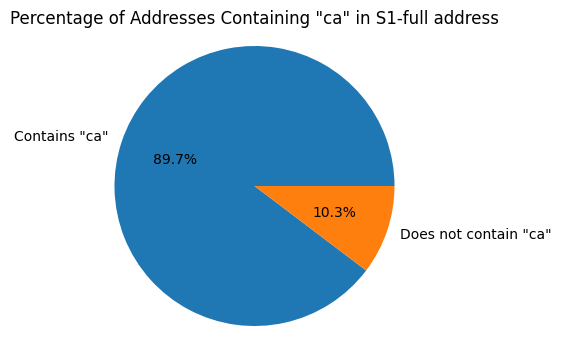

In [58]:
# Check if "ca" is present in 'S1-full address' and count how many addresses contain "ca" and how many do not
count_ca = df['S1-full address'].str.contains('ca', case=False, na=False).value_counts()

# Create a pie chart for the percentage of addresses containing "ca"
plt.figure(figsize=(6, 4))
plt.pie(count_ca, labels=['Contains "ca"', 'Does not contain "ca"'], autopct='%1.1f%%')
plt.title('Percentage of Addresses Containing "ca" in S1-full address')
plt.axis('equal')
plt.show()

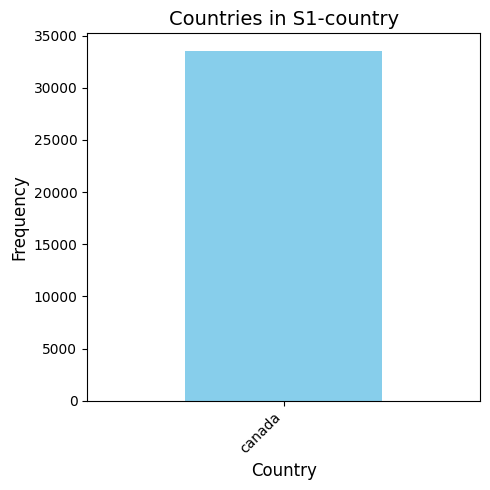

In [59]:
top_countries = df['Country'].value_counts()

plt.figure(figsize=(5, 5))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Countries in S1-country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotește etichetele pentru a le face mai ușor de citit
plt.tight_layout()
plt.show()

In [60]:
df = df.fillna('')


In [61]:
# df.head()

In [62]:
df['Location'] = df[['Country', 'Region', 'City']].agg(lambda x: ', '.join(x[x != '']), axis=1)

In [63]:
df.head()

,S1-full address,S1-phone,S1-region,S1-city,S1-country,S2-activity,S2-website,S2-country,S2-region,S2-city,...,S4-activity,S5-activity,S6-activity,Phone,Website,Activity,Country,Region,City,Location
0,32 blue springs rd north york on m6l2t3 ca,4168582406,ontario,north york,canada,energy - equipment & supplies,safeelectricalsolutions.ca,,,,...,electrical & wiring contractors,,electric utility company,141623671000,safeelectricalsolutions.ca,electrical & wiring contractors,canada,ontario,north york,"canada, ontario, north york"
1,on ca,,ontario,,canada,,,,,,...,,,,185599299130,auto-master.com,,canada,ontario,houston,"canada, ontario, houston"
2,on ca,,ontario,,canada,,,,,,...,vintage clothing store,bakeries & desserts,,,,bakeries & desserts,canada,ontario,,"canada, ontario"
3,2000 talbot rd windsor on n9a6s4 ca,,ontario,windsor,canada,,stclaircollege.ca,canada,ontario,windsor,...,,,,15199722727,stclaircollege.ca,,canada,ontario,windsor,"canada, ontario, windsor"
4,5117 52 st wabamun ab t0e2k0 ca,9059653927,alberta,wabamun,canada,,,,,,...,,,,9059653927,,oil & gas - extraction & distribution,canada,alberta,wabamun,"canada, alberta, wabamun"


In [64]:
df = df[['Location','Phone','Website','Activity']]

In [65]:
df.head(20)

,Location,Phone,Website,Activity
0,"canada, ontario, north york",141623671000,safeelectricalsolutions.ca,electrical & wiring contractors
1,"canada, ontario, houston",185599299130,auto-master.com,
2,"canada, ontario",,,bakeries & desserts
3,"canada, ontario, windsor",15199722727,stclaircollege.ca,
4,"canada, alberta, wabamun",9059653927,,oil & gas - extraction & distribution
5,"canada, quebec, lévis",4184555425,primusconstruction.ca,
6,"canada, nova scotia, dartmouth",190244473360,allgreentreecare.com,tree services
7,"canada, ontario, toronto",6479921295,,appliance repair & maintenance
8,"canada, ontario, hamilton",190552362490,sharpknifeshop.com,kitchen furniture & equipment
9,"canada, ontario, burlington",19057690842,bluehousestaginganddesign.ca,decorators & interior designers


In [66]:
df.duplicated().sum()

np.int64(2219)

In [67]:
df.shape

(33540, 4)

In [68]:
df = df.drop_duplicates()

In [69]:
df.shape

(31321, 4)

In [70]:
df['Phone'].duplicated().sum()

np.int64(6615)

In [73]:
df['Website'].duplicated().sum()

np.int64(7338)

In [75]:
# df = df[df['Website'] != '']

In [76]:
df.shape

(31321, 4)

In [77]:
# Filter out rows where 'Phone' is not an empty string and check for duplicates
duplicates_phone = df[df['Phone'] != '']['Phone'].duplicated(keep=False).sum()

print(duplicates_phone)

3028


In [78]:
# df.to_csv('final-dataset.csv', index = False)

In [80]:
def combine_similar(values):
    # Remove empty or None values
    values = [val for val in values if val]

    # If the list is empty, return None or a fallback value
    if not values:
        return None

    # If all values are identical or very similar (>90), return one of them
    if len(values) > 1 and all(fuzz.ratio(values[0], val) > 90 for val in values[1:]):
        return values[0]

    # If there is a majority value, return it
    most_common = max(set(values), key=values.count)
    if values.count(most_common) > len(values) // 2:
        return most_common

    # If the values are different but similar (>80), return the longest one
    similar_values = [val for val in values if fuzz.ratio(most_common, val) > 80]
    if similar_values:
        return max(similar_values, key=len)

    # If all values are very different (<80), return the longest one
    return max(values, key=len)

# Apply the generalized function to all the desired columns
df = df.groupby('Website', as_index=False).agg({
    'Location': lambda x: combine_similar(x),
    'Phone': lambda x: combine_similar(x),
    'Activity': lambda x: combine_similar(x),
})

In [81]:
df.to_csv('final-dataset.csv', index = False)

In [95]:
df.shape

(23983, 4)

In [97]:
# duplicated_phones = df[df['Phone'].duplicated(keep=False) & (df['Phone'] != '')]['Phone']
# valid_duplicated_phones = duplicated_phones.dropna()
# valid_duplicated_phones

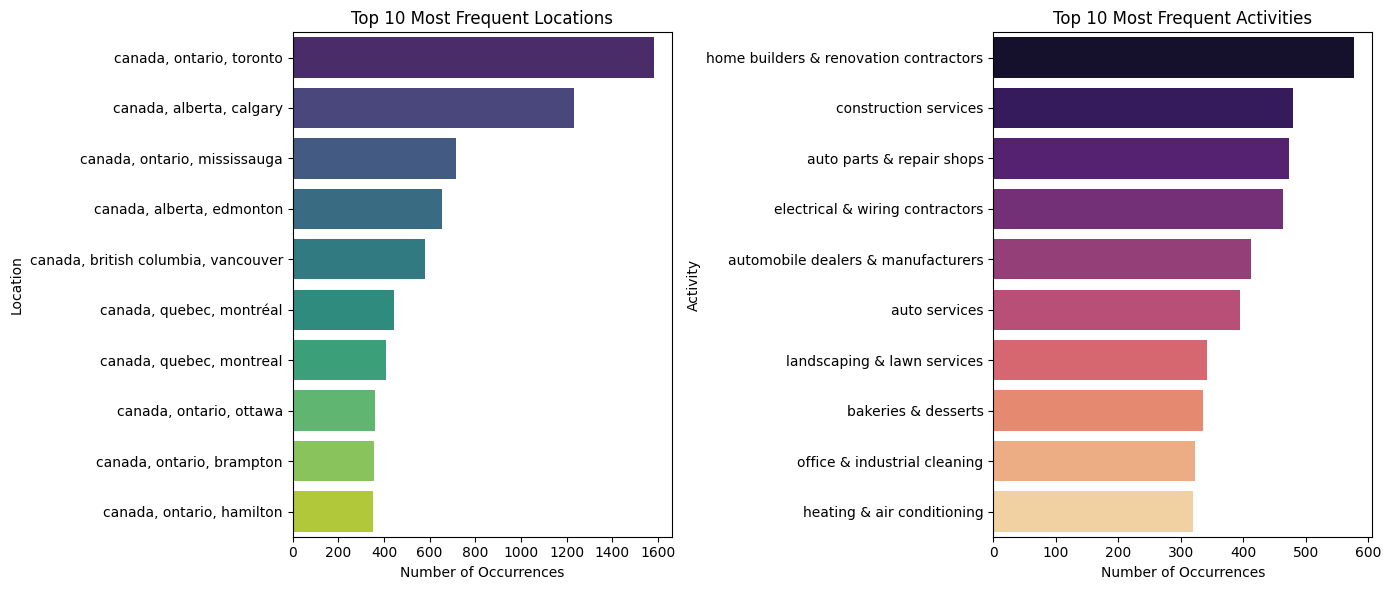

In [96]:
# Calculating the top 10 most frequent locations and activities
top_10_locations = df['Location'].value_counts().head(10)
top_10_activities = df['Activity'].value_counts().head(10)

# Creating the figures
plt.figure(figsize=(14, 6))

# Plot for locations
plt.subplot(1, 2, 1)
sns.barplot(x=top_10_locations.values, y=top_10_locations.index, hue=top_10_locations.index, palette='viridis', legend=False)
plt.title('Top 10 Most Frequent Locations')
plt.xlabel('Number of Occurrences')
plt.ylabel('Location')

# Plot for activities
plt.subplot(1, 2, 2)
sns.barplot(x=top_10_activities.values, y=top_10_activities.index, hue=top_10_activities.index, palette='magma', legend=False)
plt.title('Top 10 Most Frequent Activities')
plt.xlabel('Number of Occurrences')
plt.ylabel('Activity')

plt.tight_layout()
plt.show()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23983 entries, 0 to 23982
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Website   23983 non-null  object
 1   Location  23983 non-null  object
 2   Phone     22181 non-null  object
 3   Activity  21426 non-null  object
dtypes: object(4)
memory usage: 749.6+ KB
